<a href="https://colab.research.google.com/github/rishim929/AIassesment/blob/main/WLVID_RishimSapkota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif


In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd

file_path = '/content/drive/MyDrive/diabetes.csv'
df = pd.read_csv(file_path)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
def risk_level(glucose):
    if glucose < 140:
        return 'Low'
    elif glucose < 200:
        return 'Moderate'
    else:
        return 'High'

df['RiskLevel'] = df['Glucose'].apply(risk_level)
df[['Glucose', 'RiskLevel']].head()


,Glucose,RiskLevel
0,148,Moderate
1,85,Low
2,183,Moderate
3,89,Low
4,137,Low


In [11]:
le = LabelEncoder()
df['RiskLevel'] = le.fit_transform(df['RiskLevel'])
le.classes_


array(['Low', 'Moderate'], dtype=object)

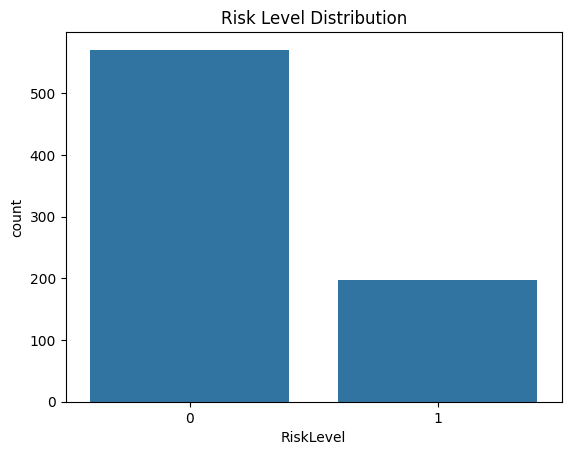

In [12]:
sns.countplot(x=df['RiskLevel'])
plt.title("Risk Level Distribution")
plt.show()


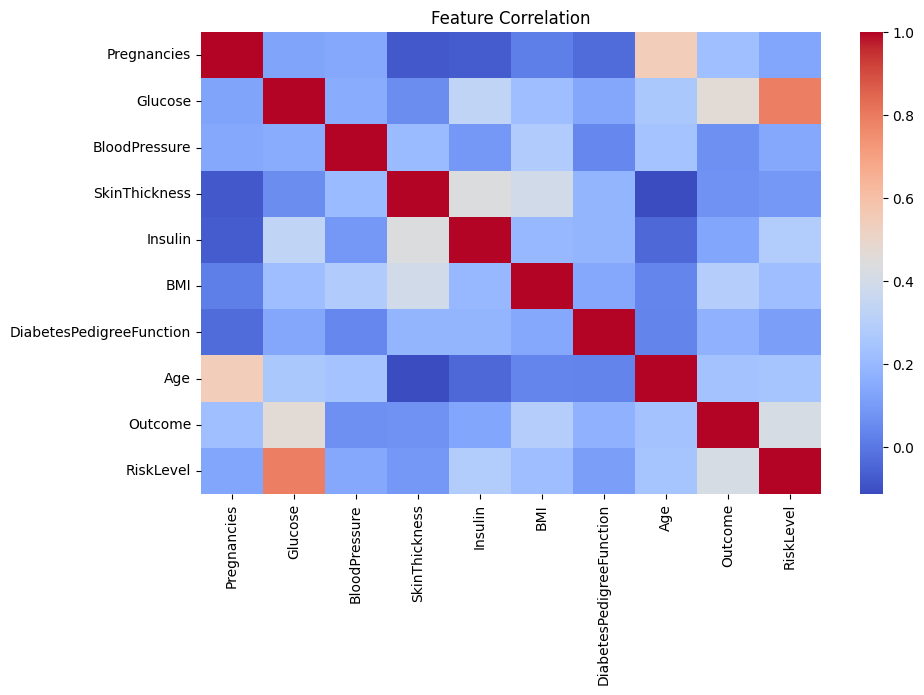

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation")
plt.show()


In [14]:
X = df.drop(['RiskLevel', 'Outcome'], axis=1, errors='ignore')
y = df['RiskLevel']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
mlp = MLPClassifier(
    hidden_layer_sizes=(16, 8),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)

print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


MLP Accuracy: 0.974025974025974
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       114
           1       0.97      0.93      0.95        40

    accuracy                           0.97       154
   macro avg       0.97      0.96      0.97       154
weighted avg       0.97      0.97      0.97       154



In [16]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


In [17]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


In [18]:
def evaluate(model_name, y_true, y_pred):
    print(model_name)
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1:", f1_score(y_true, y_pred, average='weighted'))
    print()

evaluate("Logistic Regression", y_test, y_pred_lr)
evaluate("Decision Tree", y_test, y_pred_dt)


Logistic Regression
Accuracy: 0.974025974025974
Precision: 0.9740200815518418
Recall: 0.974025974025974
F1: 0.9738059042406869

Decision Tree
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0



In [19]:
param_lr = {'C': [0.01, 0.1, 1, 10]}
grid_lr = GridSearchCV(LogisticRegression(max_iter=500), param_lr, cv=5)
grid_lr.fit(X_train_scaled, y_train)

grid_lr.best_params_


{'C': 10}

In [20]:
param_dt = {'max_depth': [3, 5, 10, None]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_dt, cv=5)
grid_dt.fit(X_train, y_train)

grid_dt.best_params_


{'max_depth': 3}

In [21]:
selector = SelectKBest(score_func=f_classif, k=5)
X_train_fs = selector.fit_transform(X_train_scaled, y_train)
X_test_fs = selector.transform(X_test_scaled)

selected_features = X.columns[selector.get_support()]
selected_features


Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')

In [22]:
lr_final = LogisticRegression(max_iter=500, C=grid_lr.best_params_['C'])
lr_final.fit(X_train_fs, y_train)

y_pred_final = lr_final.predict(X_test_fs)

print("Final Model Performance")
print(classification_report(y_test, y_pred_final))


Final Model Performance
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       114
           1       1.00      0.97      0.99        40

    accuracy                           0.99       154
   macro avg       1.00      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154

